## Vamos a estudiar el Hamiltoniuano de Jaynes Cummings en el caso de un átomo de dos niveles acoplado a un modo de un campo electromagnético, estos acoplados por una función envolvente en el tiempo. Además vamos a añadir un campo de radiación externo que acople a la cavidad con el pulso. En primera instancia, el pulso que acompañe al Jaynes Cummings será una función tipo escalon, y el pulso para la radiación sera del tipo $\sin^{2}(\frac{\pi t}{T}) \cos(\omega_{l}t)$.

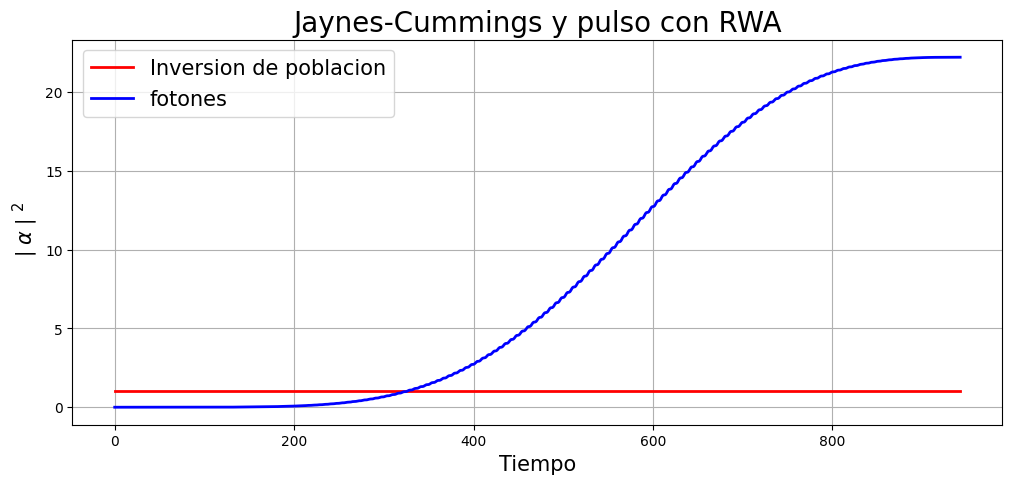

In [14]:
# Importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from scipy import *

# Definimos las constantes necesarias
hbar = 1.0
N = 2
N1=300
#N1=3
omega_l = 0.5
omega_c = 0.5
omega_0 = 0.5
mu=0.5
E0=0.02
g=0.01
n=3
n2=0
#Estos son los periodos que conozco del problema solamente atómico
#Periodo del pulso para recuperación de poblacion
T=n*np.pi/(g)
#T=16*np.pi
#Periodo del pulso para inversión de la población
#T=(2*n+1)*np.pi/(g*2)
#Periodo del pulso para inversion de poblacion nula
#T=np.pi*(2*n+1)/(4*g)
# Definimos la funcion que nos da el pulso
#T=np.pi*(2*n+1)/(2*g*np.sqrt(n2+1))
#T=1413

def pulso(t, args):
    return E0*(np.sin(np.pi*t/T)**2) * np.cos(omega_l * (t-T/2))

def pulso_l(t, args):
    return g*np.sin(np.pi*t/T)**2

def pulso2(t):
    return (np.sin(np.pi*t/T)**2) * np.cos(omega_l * (t-T/2))

def pulso_l2(t,g):
    return g*np.sin(np.pi*t/T)**2

#Definamos un pulso lineal
def pulso_lineal(t, args):
    return g*t/T

def pulso_lineal_2(t):
    return g*t/T

#Escribamos la función analitica para la inversion de poblacion
def inversion0(t,g,n):
    return np.cos(2*g*t*np.sqrt(n2+1))

# Definir la función Heaviside
def heaviside(t,args):
    return g
def heaviside2(t,g):
    return g

#Definamos un puso de onda plana
def pulso_plano(t,args):
    return E0*np.exp(1j*omega_l*t)/2

#Ahora con argumento negativo
def pulso_plano2(t,args):
    return E0*np.exp(-1j*omega_l*t)/2

psi01 = tensor(basis(N1, 0), basis(2, 1))  # start with an ground state for the atoms and zero photons
#psi01 = tensor(basis(N1, 1), basis(2, 0))  # start with an ground state for the atoms and one photon

# operators
a = tensor(destroy(N1), qeye(2))
sm = tensor(qeye(N1), destroy(2))
#Definamos sigma x y sigma y#plt.plot(t,-(result.expect[2]-result.expect[3]),label="Sigma y - Sigma x")


# Hamiltonian


H0 = omega_c * a.dag() * a + 0.5*omega_0 * (sm.dag() * sm-sm *sm.dag())*0+0*(a.dag()*sm + a*sm.dag())

# Definimos el tiempo discreto
num_steps = 1000

t = np.linspace(0, T, num_steps)
t2 = np.linspace(0, T, num_steps)

HI1 = (a + a.dag())
HI2 = g*(a.dag()*sm + a*sm.dag())


# Definimos el Hamiltoniano total
HH= [H0, [HI1, pulso], [HI2, heaviside]]
H= [H0, [HI1, pulso]]
H2= [H0, [HI1, pulso], [HI2, pulso_l]]
H3= [H0, [HI1, pulso_plano], [HI2, heaviside]]
H4= [H0, [HI1, pulso_plano2], [HI2, heaviside]]
H5= [H0, [HI1, pulso_plano], [HI2, pulso_l]]
H6= [H0, [HI1, pulso_plano2], [HI2, pulso_l]]



# Resolvemos la ecuacion diferencial
result = mesolve(H, psi01, t, [], [a.dag() * a , sm.dag() * sm-sm *sm.dag()])
result1 = mesolve(H, psi01, t, [], [])


# Graficamos la inversion de poblacion
plt.figure(figsize=(12,5))
plt.title("Jaynes-Cummings y dipolo de la radiacion",fontsize=20)
plt.plot(t, result.expect[1], label="Inversion de poblacion",color='red',lw=2)
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel('Inversion de poblacion',fontsize=15)
plt.title("Jaynes-Cummings y pulso con RWA",fontsize=20)
plt.legend(fontsize=15)

plt.title("Jaynes-Cummings y dipolo de la radiacion",fontsize=20)
#plt.plot(t, result.expect[0], label="Número promedio de fotones",color='black',lw=2)
plt.plot(t, result.expect[0], label="fotones",color='blue',lw=2)
#plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel(r'$\mid \alpha\mid ^2$',fontsize=15)
plt.title("Jaynes-Cummings y pulso con RWA",fontsize=20)
plt.legend(fontsize=15)
plt.show()

In [16]:
psi=result1.states[999]
psi*psi.dag()

Quantum object: dims = [[300, 2], [300, 2]], shape = (600, 600), type = oper, isherm = True
Qobj data =
[[ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  2.26961199e-10+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ... -3.96500975e-09+3.33689927e-09j
   0.00000000e+00+0.00000000e+00j  2.32993856e-09-1.69458024e-09j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 ...
 [ 0.00000000e+00+0.00000000e+00j -3.96500975e-09-3.33689927e-09j
   0.00000000e+00+0.00000000e+00j ...  1.18329473e-07+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j -6.56185848e-08-4.65164559e-09j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000

In [11]:
psi=result1.states[999]
H0 = omega_c * a.dag() * a + 0.5*omega_0 * (sm.dag() * sm-sm *sm.dag())+g*(a.dag()*sm + a*sm.dag())

# Definimos el tiempo discreto
num_steps = 10000

t = np.linspace(0, T, num_steps)


HI1 = (a + a.dag())


# Definimos el Hamiltoniano total

H= [H0, [HI1, pulso]]

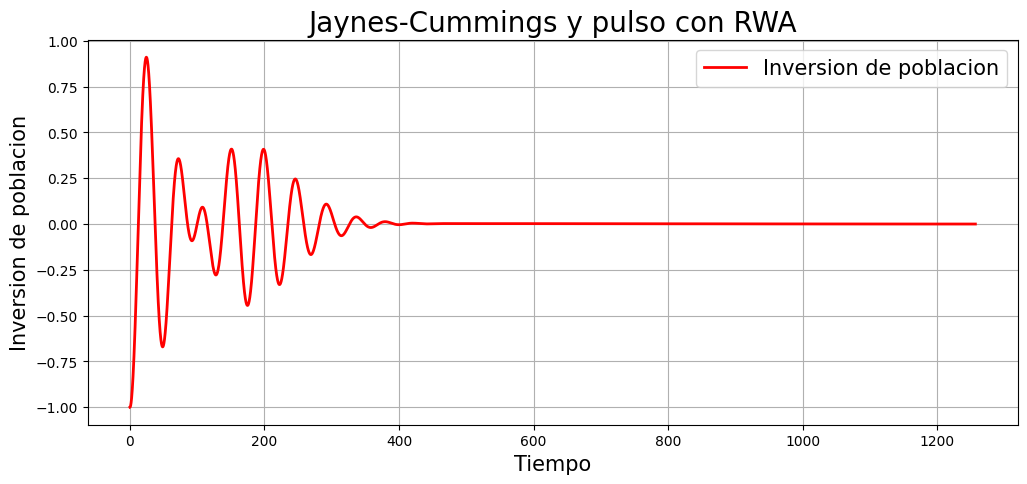

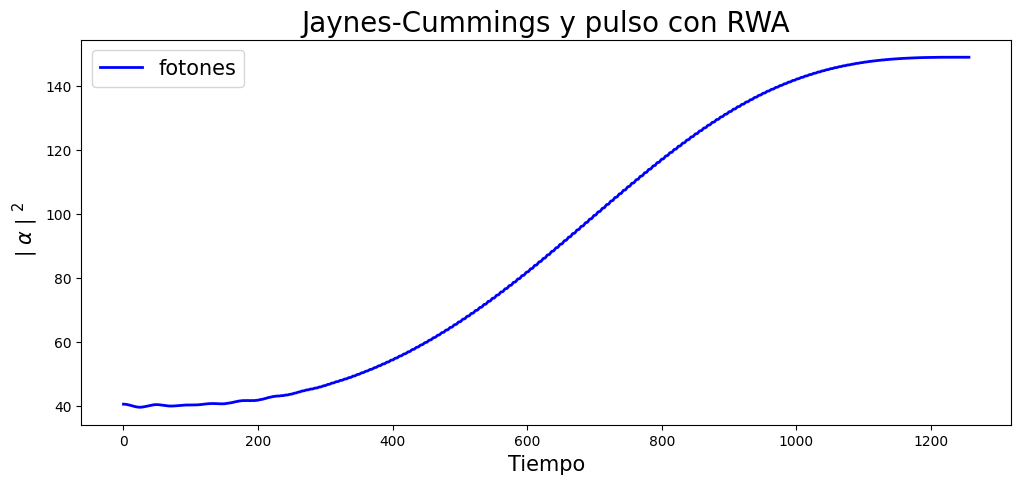

In [12]:
result = mesolve(H, psi, t, [], [a.dag() * a , sm.dag() * sm-sm *sm.dag()])

# Graficamos la inversion de poblacion
plt.figure(figsize=(12,5))
plt.title("Jaynes-Cummings y dipolo de la radiacion",fontsize=20)
plt.plot(t, result.expect[1], label="Inversion de poblacion",color='red',lw=2)
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel('Inversion de poblacion',fontsize=15)
plt.title("Jaynes-Cummings y pulso con RWA",fontsize=20)
plt.legend(fontsize=15)
plt.show()

plt.figure(figsize=(12,5))
plt.title("Jaynes-Cummings y dipolo de la radiacion",fontsize=20)
#plt.plot(t, result.expect[0], label="Número promedio de fotones",color='black',lw=2)
plt.plot(t, result.expect[0], label="fotones",color='blue',lw=2)
#plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel(r'$\mid \alpha\mid ^2$',fontsize=15)
plt.title("Jaynes-Cummings y pulso con RWA",fontsize=20)
plt.legend(fontsize=15)
plt.show()



In [23]:
pi_total=(result.expect[4]+result.expect[7]+result.expect[10]+result.expect[11]+result.expect[12]+result.expect[13]+result.expect[14]+result.expect[15]+result.expect[16]+result.expect[17])

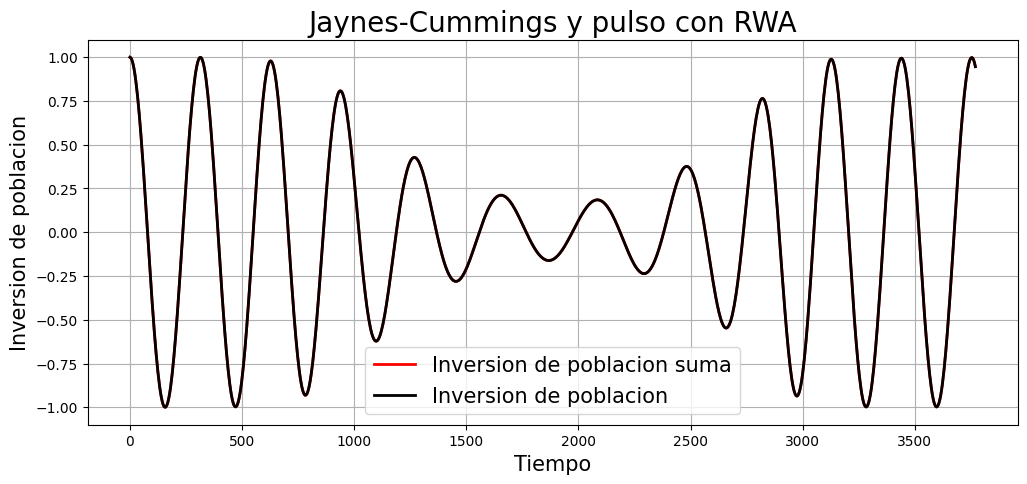

In [24]:
# Graficamos la inversion de poblacion total
plt.figure(figsize=(12,5))
plt.title("Jaynes-Cummings y dipolo de la radiacion",fontsize=20)
plt.plot(t, pi_total, label="Inversion de poblacion suma",color='red',lw=2)
plt.plot(t, result.expect[1], label="Inversion de poblacion",color='black',lw=2)
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel('Inversion de poblacion',fontsize=15)
plt.title("Jaynes-Cummings y pulso con RWA",fontsize=20)
plt.legend(fontsize=15)


In [13]:
psi17*psi17.dag()-psi18*psi18.dag()

Quantum object: dims = [[10, 2], [10, 2]], shape = (20, 20), type = oper, isherm = True
Qobj data =
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

In [14]:
a1=tensor(basis(2, 0), basis(N1, 0)) #Estado |g,8>
a1.dag()*a1

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[1.]]

In [15]:
#Tensor para a y a.dag
a = tensor(destroy(N1), qeye(2))
ad= tensor(create(N1), qeye(2))
#Operador número
N=a.dag()*a
#Quiero extraer subindices de la matriz N

for i in range(0,51):
    print(i)
#Volver a N una matriz normal
N_matriz=N.full()
N_matriz

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j,
   

In [23]:
matriz = [[0] * 102 for _ in range(102)]
matriz[1][1] = 1
matriz[2][2] = 1
#Convirtamos la matriz en un operador de Qutip
matriz=Qobj(matriz)
matriz






Quantum object: dims = [[102], [102]], shape = (102, 102), type = oper, isherm = True
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

In [25]:
#Definamos una función que nos permita extraer el operador número para cada variedad

"""def operador_numero(N1):
    matriz = [[0] * N1*2 for _ in range(N1*2)]
    a = tensor(destroy(N1), qeye(2))
    ad= tensor(create(N1), qeye(2))
    N=ad*a
    N_matriz=N.full()
    Lista_expect=[]"""
N1=11
a = tensor(destroy(N1), qeye(2))
ad= tensor(create(N1), qeye(2))
N=ad*a
N_matriz=N.full()
N_prueba=Qobj(N_matriz)
Lista_expect=[]   

for i in range(0,N1):
    matriz = [[0] * N1*2 for _ in range(N1*2)]
    matriz[2*i-1][2*i-1] = 1
    matriz[2*i][2*i] = 1
    producto=matriz*N_matriz
    producto=Qobj(producto,dims=[[N1,2],[N1,2]])
    result1 = mesolve(H, psi1, t,[], [producto])
    Lista_expect.append(result1.expect[0])
    print(i)





0
1
2
3
4
5
6
7
8
9
10


In [10]:
matriz = [[0] * 4*2 for _ in range(4*2)]
matriz[-1][-1] = 1
matriz

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1]]

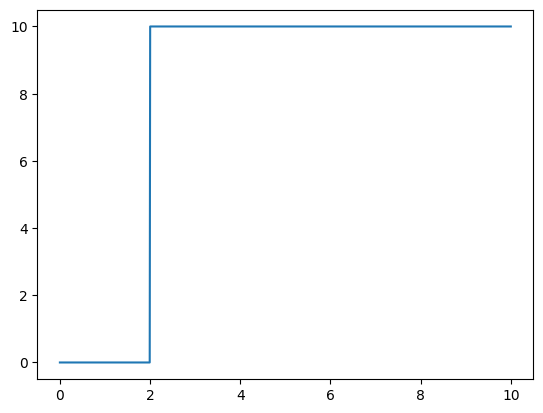

In [18]:
int(3/2)
import numpy as np
import matplotlib.pyplot as plt


np.heaviside([-3,-1.5, 0, 2.0,3], 1)*4
t=np.linspace(0, 10, 1000)
plt.plot(t, np.heaviside(t-2, 1)*10)


In [25]:

#Sumamos los elementos de la lista
import matplotlib.pyplot as plt
import numpy as np
a=[np.array([1,2,3,10]),np.array([4,5,6,10]),np.array([7,8,9,10])]
t=np.linspace(0,3,3)
#plt.plot(t,sum(a))
print(sum(a))


[12 15 18 30]


In [21]:
max([4,9,14])

14

In [26]:
lista_enelementos = []
for i in range(len(a)):
    enelemento = a[i][3]
    #Agrego el enesimo elemento a la lista de enelementos
    lista_enelementos.append(enelemento)

lista_enelementos

[10, 10, 10]

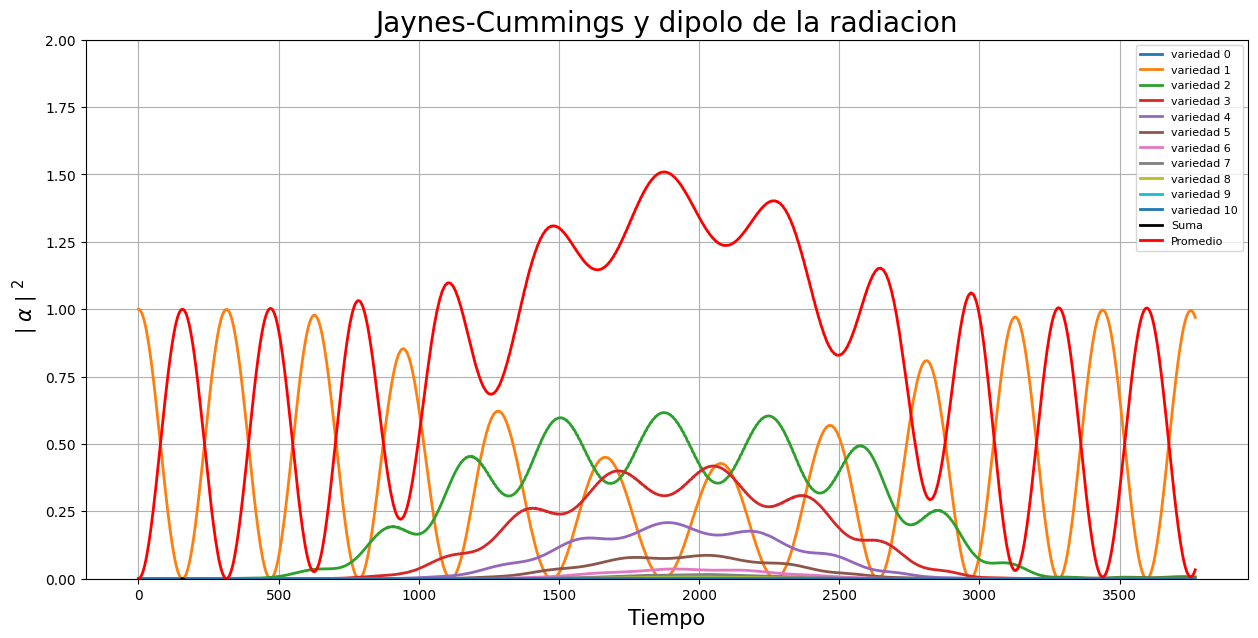

In [29]:

#Grafiquemos todos los operadores número en una misma gráfica y la suma de todos ellos
plt.figure(figsize=(15,7))
plt.title("Jaynes-Cummings y dipolo de la radiacion",fontsize=20)
for i in range(0,N1):
    plt.plot(t, Lista_expect[i], label="variedad "+str(i),lw=2)


plt.plot(t, -sum(Lista_expect), label="Suma",color='black',lw=2)
plt.plot(t, result.expect[0], label="Promedio",color='red',lw=2)
plt.ylim(0, 2)


plt.grid()
plt.legend(fontsize=8)
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel(r'$\mid \alpha\mid ^2$',fontsize=15)
plt.show()

In [21]:
#Veamos el tamaño de la lista

len(Lista_expect)



10

Quantum object: dims = [[51], [51]], shape = (51, 51), type = oper, isherm = True
Qobj data =
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

## Ahora consideremios que en Jaynes Cummings interactua con un pulso de tipo $\sin^{2}(\frac{\pi t}{T})$.

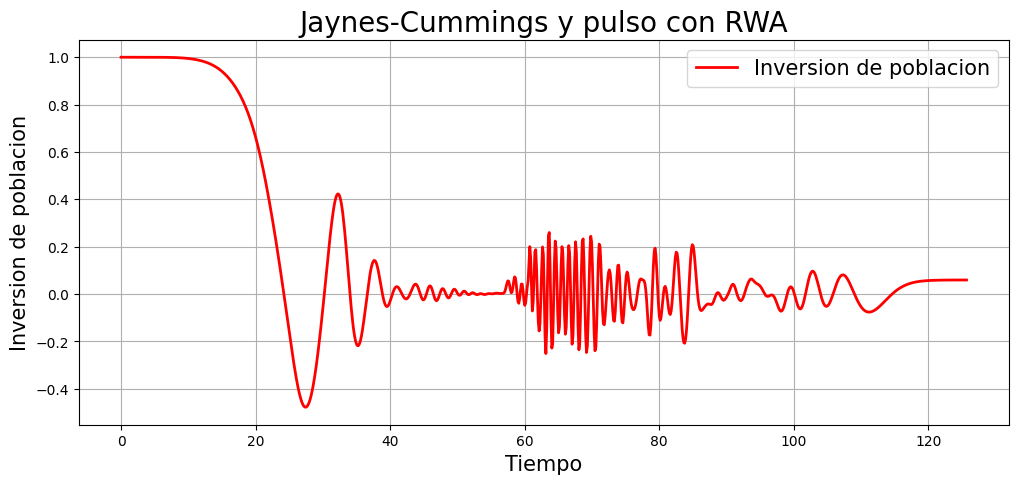

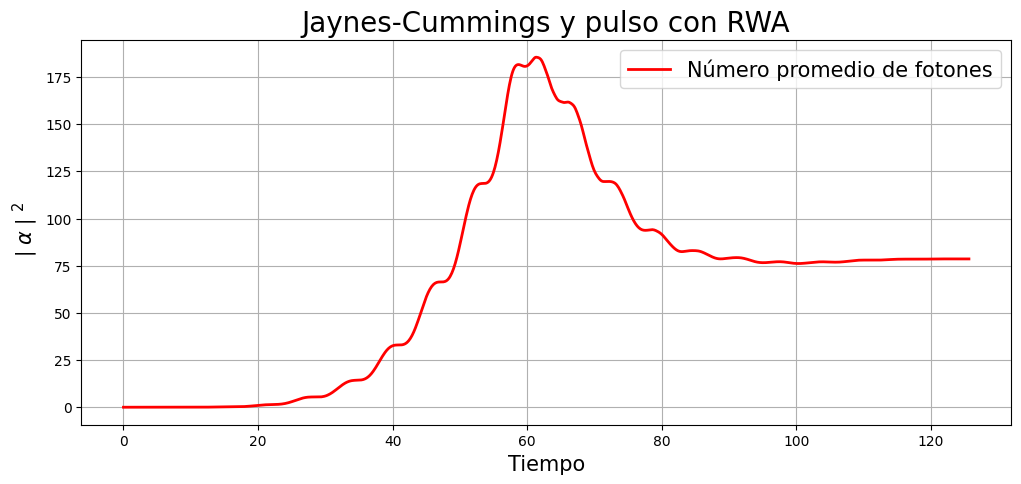

In [ ]:
# Resolvemos la ecuacion diferencial
result2 = mesolve(H2, psi01, t, [], [a.dag() * a, (sm.dag() * sm-sm *sm.dag()),sm *sm.dag(),sm.dag() * sm])


# Graficamos la inversion de poblacion
plt.figure(figsize=(12,5))
plt.title("Jaynes-Cummings y dipolo de la radiacion",fontsize=20)
plt.plot(t, result2.expect[1], label="Inversion de poblacion",color='red',lw=2)
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel('Inversion de poblacion',fontsize=15)
plt.title("Jaynes-Cummings y pulso con RWA",fontsize=20)
plt.legend(fontsize=15)
plt.show()




plt.figure(figsize=(12,5))
plt.title("Jaynes-Cummings y dipolo de la radiacion",fontsize=20)
plt.plot(t, result2.expect[0], label="Número promedio de fotones",color='red',lw=2)
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel(r'$\mid \alpha\mid ^2$',fontsize=15)
plt.title("Jaynes-Cummings y pulso con RWA",fontsize=20)
plt.legend(fontsize=15)
plt.show()

### Ahora repitamos los casos de arriba pero hagamos aproximaciones de onda rotante a los pulsos que interactuan con el dipolo de la radiación.


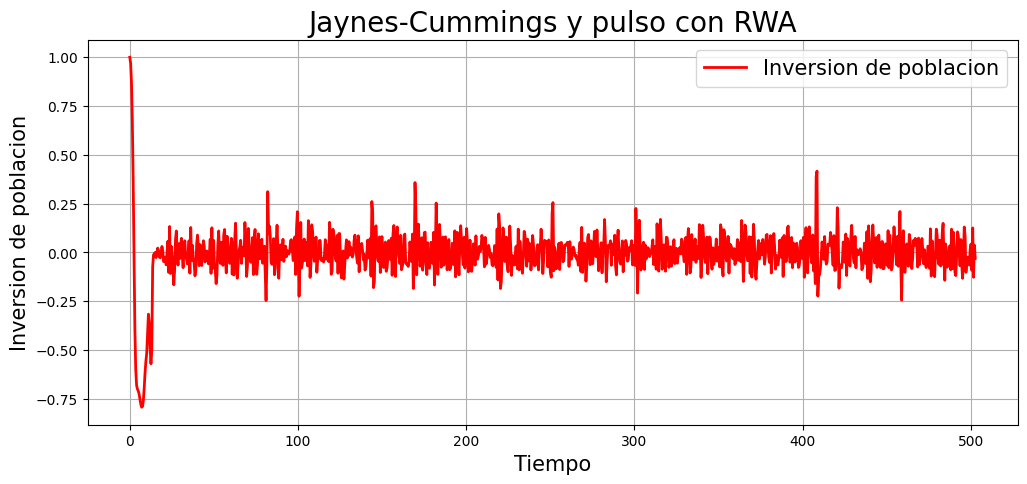

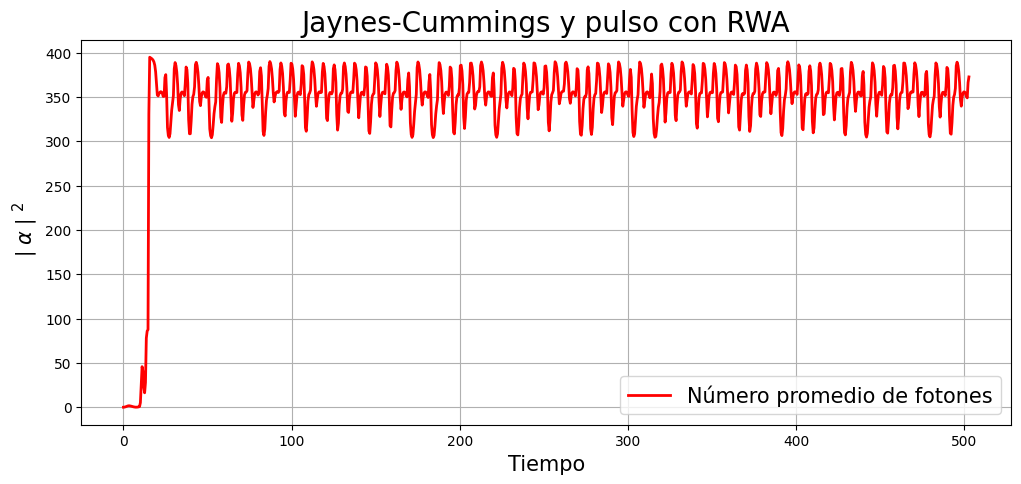

In [ ]:
# Resolvemos la ecuacion diferencial
result3 = mesolve(H3, psi01, t, [], [a.dag() * a, (sm.dag() * sm-sm *sm.dag()),sm *sm.dag(),sm.dag() * sm])


# Graficamos la inversion de poblacion
plt.figure(figsize=(12,5))
plt.title("Jaynes-Cummings y dipolo de la radiacion",fontsize=20)
plt.plot(t, result3.expect[1], label="Inversion de poblacion",color='red',lw=2)
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel('Inversion de poblacion',fontsize=15)
plt.title("Jaynes-Cummings y pulso con RWA",fontsize=20)
plt.legend(fontsize=15)
plt.show()




plt.figure(figsize=(12,5))
plt.title("Jaynes-Cummings y dipolo de la radiacion",fontsize=20)
plt.plot(t, result3.expect[0], label="Número promedio de fotones",color='red',lw=2)
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel(r'$\mid \alpha\mid ^2$',fontsize=15)
plt.title("Jaynes-Cummings y pulso con RWA",fontsize=20)
plt.legend(fontsize=15)
plt.show()

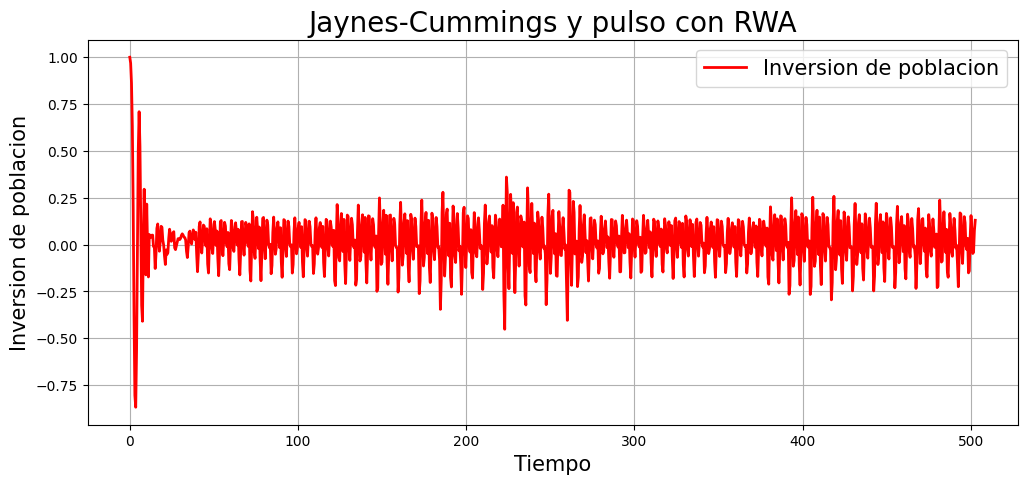

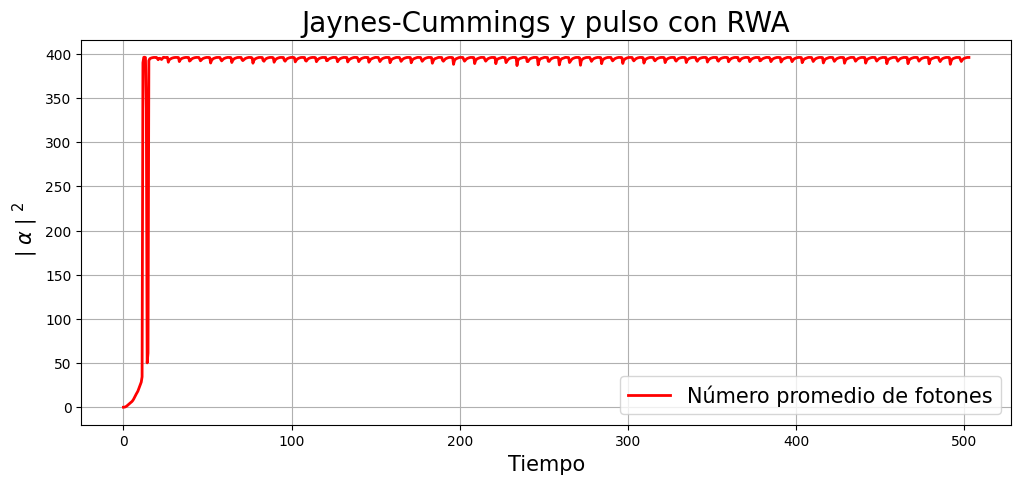

In [ ]:
# Resolvemos la ecuacion diferencial
result4 = mesolve(H4, psi01, t, [], [a.dag() * a, (sm.dag() * sm-sm *sm.dag()),sm *sm.dag(),sm.dag() * sm])


# Graficamos la inversion de poblacion
plt.figure(figsize=(12,5))
plt.title("Jaynes-Cummings y dipolo de la radiacion",fontsize=20)
plt.plot(t, result4.expect[1], label="Inversion de poblacion",color='red',lw=2)
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel('Inversion de poblacion',fontsize=15)
plt.title("Jaynes-Cummings y pulso con RWA",fontsize=20)
plt.legend(fontsize=15)
plt.show()




plt.figure(figsize=(12,5))
plt.title("Jaynes-Cummings y dipolo de la radiacion",fontsize=20)
plt.plot(t, result4.expect[0], label="Número promedio de fotones",color='red',lw=2)
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel(r'$\mid \alpha\mid ^2$',fontsize=15)
plt.title("Jaynes-Cummings y pulso con RWA",fontsize=20)
plt.legend(fontsize=15)
plt.show()

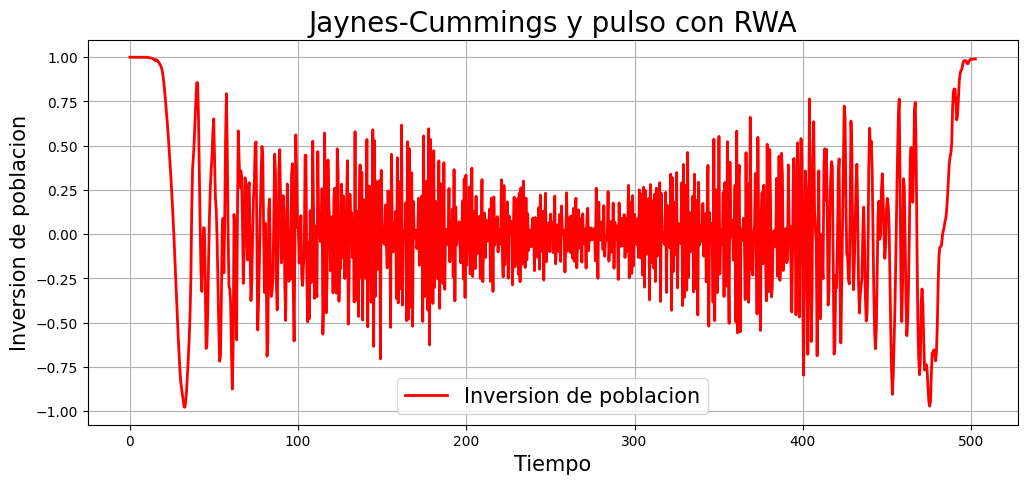

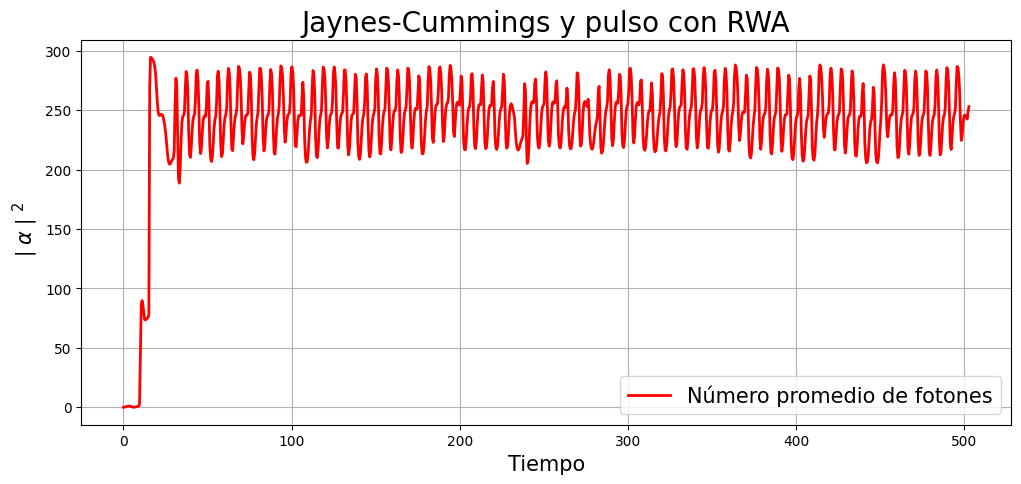

In [ ]:
# Resolvemos la ecuacion diferencial
result5 = mesolve(H5
                  , psi01, t, [], [a.dag() * a, (sm.dag() * sm-sm *sm.dag()),sm *sm.dag(),sm.dag() * sm])


# Graficamos la inversion de poblacion
plt.figure(figsize=(12,5))
plt.title("Jaynes-Cummings y dipolo de la radiacion",fontsize=20)
plt.plot(t, result5.expect[1], label="Inversion de poblacion",color='red',lw=2)
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel('Inversion de poblacion',fontsize=15)
plt.title("Jaynes-Cummings y pulso con RWA",fontsize=20)
plt.legend(fontsize=15)
plt.show()




plt.figure(figsize=(12,5))
plt.title("Jaynes-Cummings y dipolo de la radiacion",fontsize=20)
plt.plot(t, result5.expect[0], label="Número promedio de fotones",color='red',lw=2)
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel(r'$\mid \alpha\mid ^2$',fontsize=15)
plt.title("Jaynes-Cummings y pulso con RWA",fontsize=20)
plt.legend(fontsize=15)
plt.show()

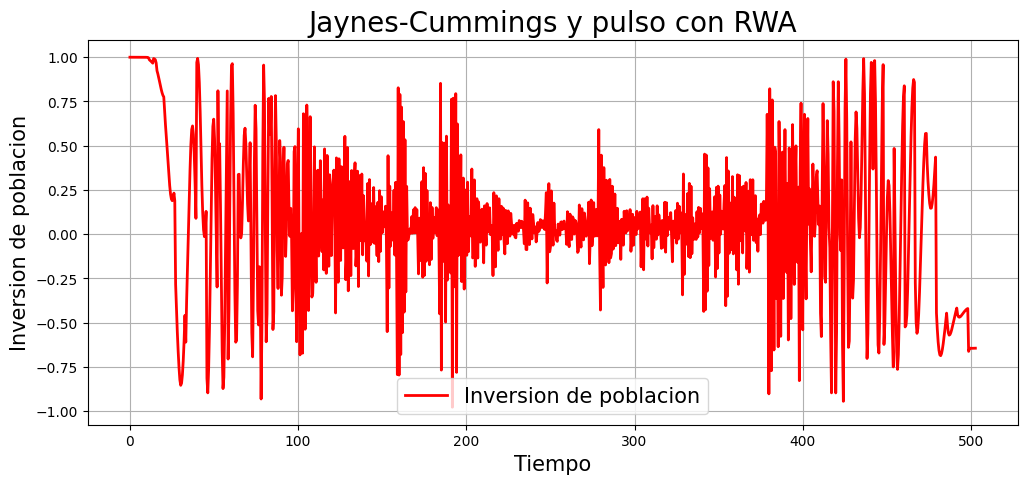

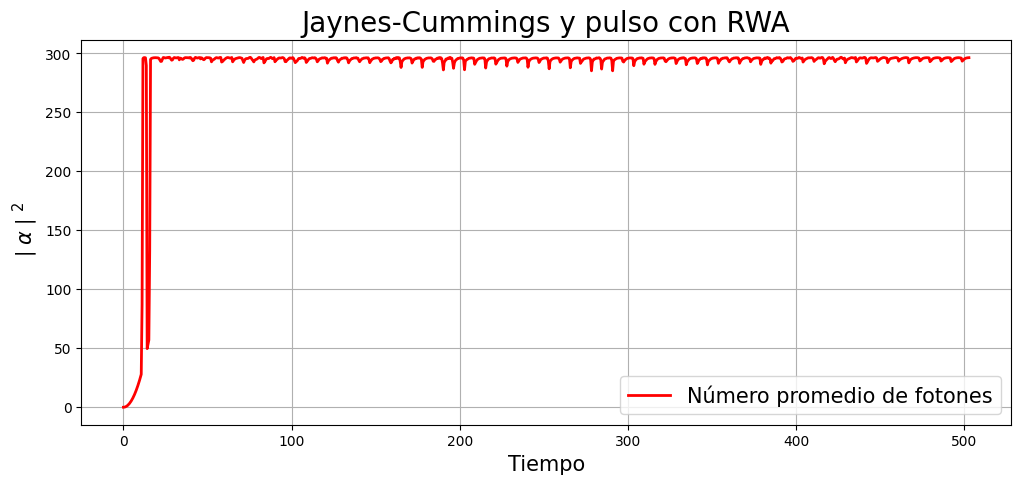

In [ ]:
# Resolvemos la ecuacion diferencial
result6 = mesolve(H6, psi01, t, [], [a.dag() * a, (sm.dag() * sm-sm *sm.dag()),sm *sm.dag(),sm.dag() * sm])


# Graficamos la inversion de poblacion
plt.figure(figsize=(12,5))
plt.title("Jaynes-Cummings y dipolo de la radiacion",fontsize=20)
plt.plot(t, result6.expect[1], label="Inversion de poblacion",color='red',lw=2)
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel('Inversion de poblacion',fontsize=15)
plt.title("Jaynes-Cummings y pulso con RWA",fontsize=20)
plt.legend(fontsize=15)
plt.show()




plt.figure(figsize=(12,5))
plt.title("Jaynes-Cummings y dipolo de la radiacion",fontsize=20)
plt.plot(t, result6.expect[0], label="Número promedio de fotones",color='red',lw=2)
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel(r'$\mid \alpha\mid ^2$',fontsize=15)
plt.title("Jaynes-Cummings y pulso con RWA",fontsize=20)
plt.legend(fontsize=15)
plt.show()